# Why the Jupyter Notebook?

## Coding Python in a text editor

I would like to create a plot using Python. To do this with, I wrote a script called `plot_array.py` in which I defined arrays `a = [0, 1, 2, ... , 9]` and $b=a \cdot5$, and plot a graph. Then, I execute the script with command line in a terminal. The script showed the plot in a separate window. As you can see, here I have already three graphical user interfaces.

<img src="images/python_in_text_editor.png" width="800" height=auto />


## Coding Python in a Jupyter notebook

With a Jupyter notebook, we can add code blocks with Python commands and text description. Then, we can execute the code and the plot is shown within the same Jupyter notebook.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Define the Python array `a`:

In [3]:
a = np.arange(10)
print(a)

[0 1 2 3 4 5 6 7 8 9]


Compute the array $b=a \cdot 5$:

In [4]:
b = a*5
print(b)

[ 0  5 10 15 20 25 30 35 40 45]


Plot a graph of these arrays

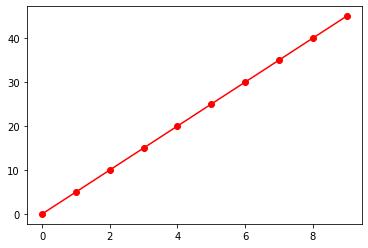

In [5]:
%matplotlib inline

plt.plot(a,b, "ro-")
plt.show()

As we can combine coding, documenting and executing codes, we can develop the prgram interactively. The Jupyter notebook is also not limited only to Python but supports also over 40 programming languages including R, Julia, and Scala.

## Use the Jupyter Notebook

* Local installation

    * Jupyter Notebook is a web-based application. Each notebook has its own tab on the web browser.
      <figure>
          <img src="images/jupyterpreview.png" width="600" height=auto />
         <figcaption style="text-align:right">Image source: https://jupyter.org/ </figcaption>
      </figure> 

    * Jupyter Lab is also a web-based application and gathers all notebooks in one place    
     <figure text-align="center">
         <img src="images/labpreview.png" width="1000" height=auto />
         <figcaption style="text-align:right">Image source: https://jupyter.org/ </figcaption>
     </figure> 
    
    
* Jupyter Hub server: a multi-user hub, e.g., on a virtual machine on the cloud


* Public cloud-based services
    * [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb#)
    * [MyBinder](https://mybinder.org/) 
    * [EGI Notebooks](https://www.egi.eu/services/notebooks/)

## Install & run the Jupyter Notebook

* Option 1: Anaconda includes Python, Jupyter, Python packages for scientific computing and data science.
    * [Download Anaconda with Python3](https://www.anaconda.com/products/individual)
    * Install Anaconda
   
    
    
* Option 2: Using `pip`
    * [Download Python3](https://www.python.org/downloads/)
    * Install Python3
    * In a terminal,
    ```bash
    $ pip3 install --upgrade pip
    ```
    
    ```bash
    $ pip3 install jupyter
    ```


* Run the notebook in a terminal,

    ```bash
    $ jupyter notebook
    ``` 

# openBIS & Jupyter

Here we would like to demonstrate how to cooperate an openBIS server, which is for data management & ELN-LIMS, with a Jupyter notebook in which you can interactively perform data analysis.

**Demo 1: From Jupyter to openBIS**
<br>
<br>
<img src="images/option1.png" width="600" height=auto />

**Demo 2: From openBIS to Jupyter**
<br>
<br>
<img src="images/option2.png" width="600" height=auto />

## Prepare a project


* Download the openbis-training repository
```bash
$ git clone https://gitlab.ethz.ch/sis-rdm-training/openbis-training.git
```


* On a browser, go to https://openbis-training.ethz.ch/openbis/webapp/eln-lims/
* Go to Lab Notebook > My Space
* Create a new project `+ New project`
    * Code(*): Training
    * Click `Save`
* Under the project `Training`, create an experiment `+ New` > `Default Experiment`
    * Code(*): JUPYTER-DEMO
    * Click `Save`
* Under the experiment `JUPYTER-DEMO`, create an experiment step `+ New` > `Experimental Step`
    * Name: JUPYTER-DEMO
    * Click `Save`
* Under the experimental step, upload an image, click on `Upload`
    * Data Set Type(*): Raw Data
    * Click on `Select files to upload`
    * Select the image `blob.tif`
    * Click `Save`

## Prepare an environment for Demo 1

* Install packages
```bash
$ pip install --upgrade numpy matplotlib scikit-image
```


* Install jupyter-openbis extension
```bash
$ pip install --upgrade jupyter-openbis-extension
$ jupyter serverextension enable --py jupyter-openbis-server
```

## Demo 1: From Jupyter to openBIS

<br>
<br>
<img src="images/option1.png" width="600" height=auto />

### Configure the connection from a Jupyter notebook to the openBIS database

* Open a Jupyter notebook
* Click on `configure openBIS connections`
* Enter 
    * Name: openbis-training
    * URL: https://openbis-training.ethz.ch/openbis/webapp/eln-lims/
    * Your username and password
    * Click `Create`
* After the status shows `connected`, choose this connection and click `Choose connection`
    

### Download a dataset
* Go to the lab notebook
   * Click on the dataset > `More...` > `Show Identification Info`
    * Copy the path under `Object:`, e.g., /JARUNANP_JARUNANP/TRAINING/JUPYTER-DEMO
* Go to the Jupyter notebook
    * Click on `Download openBIS datasets`
    * Paste the path to `Entity Identifier/permid:`
    * Click `show datasets`
    * Select the dataset and click `Download`

### Run the image anylasis 

Open `Jupyter_Demo_Notebook.ipynb` and run the analysis until the end.

### Upload the notebook and data to openBIS

* Select `File` > `Save and checkpoint` to save your work
* Select `File` > `Download as` > `HTML` to create a static version of the notebook
* Click `upload Notebook and Data to openBIS` in the menu toolbar and fill in the dataset information
    * choose a dataSet type: ANALYSIS_NOTEBOOK
    * Name: first analysis
    * Notes: results look good
    * enter a sample/experiment identifier to attach this dataSet to: /JARUNANP_JARUNANP/TRAINING/JUPYTER-DEMO
    * uncheck all parent datasets
    * select files to upload:
        * Jupyter_Demo_Notebook.html
        * Jupyter_Demo_Notebook.ipynb

## Demo 2: From openBIS to Jupyter

<br>
<br>
<img src="images/option2.png" width="600" height=auto />

### Open a Jupyter notebook from openBIS

* In the lab notebook, click on the experimental step `JUPYTER-DEMO`
* Click on `More...`
* Select `New Jupyter notebook`
* Press `Create & connect`
* In the next widget, fill in
    * Directory Name: training
    * Notebook Name: analysis_1
* Press `Accept & Open`
* Login to Jupyter Hub with your username and password

### Connect and download a dataset

* Connect to openBIS by running the cell:

  ```
  from pybis import Openbis
  o = Openbis()
  ```

  If an error message shows "Session is no longer valid. Please log in again.", add a cell with your login username

  ```
  o.login(username='jarunanp')
  ```
  
* Download a dataset
* Under the section Process the data, copy analysis process from `Jupyter_Demo_Notebook.ipynb`
* Under the section Saving the results, change type to `ANALYSIS_NOTEBOOK`
* Upload the notebook back to openBIS